In [14]:
#new Neural network project with steps
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline


# Copy of 2 h5 files and lr_utils python code copied from Coursera

# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

# use of reshape(x,-1) arranges the array to shape [x, y] where y is automatically determined based on x
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

#normalization of data
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

# Step1
def initialize_with_zeros(dim):
    w=np.zeros((dim,1))
    b=0
    
    assert(w.shape == (dim,1))
    return w,b

In [15]:
# testcell
w,b=initialize_with_zeros(3)

In [16]:
def sigmoid(Z):
    return((1/(1+np.exp(-Z))))

In [17]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [18]:
def propagation(w,b,X,y):
    #dervive values
    m=X.shape[1]
    #Forward prop
    Z=np.dot(w.T,X)+b         # Linear equation
    A=sigmoid(Z)              # Activation function
    cost=-(np.sum(np.dot(y,(np.log(A)).T)+np.dot((1-y),(np.log(1-A)).T)))/(m) #cost fn. J

    #Backward prop
    db=(np.sum(A-y))/m          # db is sum(dz) and dz is A-Y
    dw=(np.dot(X,(A-y).T))/m    # dw is sum(X.dz) and dz is A-Y
    
    #assert shape of dw and shape of cost function
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost=np.squeeze(cost)   # no need, the code to work as is without this
    assert(cost.shape==())
    
    grads={"dw":dw,
           "db":db}
    
    return grads , cost

In [19]:
#Test function
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagation(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [20]:
def optimize(w,b,X,y,num_iterations= 100, learning_rate = 0.009, print_cost = True):
    costs=[]
    for i in range(num_iterations):
        grads, cost = propagation(w, b, X, y)
           
        w=w-(learning_rate*grads["dw"])
        b=b-(learning_rate*grads["db"])
        
        if i % 10==0:
            costs.append(cost)
        
        if print_cost==True and i % 10 ==0:
            print("Cost at the {0} is {1}".format(i,cost))

    parms={"w":w,
           "b":b}
    
    grads={"dw":grads["dw"],
           "db":grads["db"]}
    
    return parms, grads, costs

Cost at the 0 is 0.8077356337712417
Cost at the 10 is 0.792383802385788
Cost at the 20 is 0.7791026906582524
Cost at the 30 is 0.7675716470330366
Cost at the 40 is 0.7575081670464376
Cost at the 50 is 0.7486684423232634
Cost at the 60 is 0.7408453829957501
Cost at the 70 is 0.7338651983539402
Cost at the 80 is 0.7275833426508488
Cost at the 90 is 0.7218803652508917
Cost at the 100 is 0.7166579879670789
Cost at the 110 is 0.7118355763105821
Cost at the 120 is 0.7073470683437592
Cost at the 130 is 0.7031383624280378
Cost at the 140 is 0.6991651311036805
Cost at the 150 is 0.695391012665286
Cost at the 160 is 0.6917861274521231
Cost at the 170 is 0.688325867551864
Cost at the 180 is 0.6849899133937513
Cost at the 190 is 0.6817614366974318
Cost at the 200 is 0.6786264553787568
Cost at the 210 is 0.6755733117393786
Cost at the 220 is 0.6725922503367926
Cost at the 230 is 0.669675076275329
Cost at the 240 is 0.6668148782999891
Cost at the 250 is 0.6640058040820601
Cost at the 260 is 0.661242

Cost at the 2280 is 0.343330788469264
Cost at the 2290 is 0.3424078156805505
Cost at the 2300 is 0.34148894050057227
Cost at the 2310 is 0.34057413977734075
Cost at the 2320 is 0.339663390504011
Cost at the 2330 is 0.3387566698180202
Cost at the 2340 is 0.3378539550002288
Cost at the 2350 is 0.33695522347406487
Cost at the 2360 is 0.3360604528046703
Cost at the 2370 is 0.3351696206980513
Cost at the 2380 is 0.3342827050002304
Cost at the 2390 is 0.33339968369640277
Cost at the 2400 is 0.3325205349100934
Cost at the 2410 is 0.33164523690232056
Cost at the 2420 is 0.3307737680707586
Cost at the 2430 is 0.32990610694890704
Cost at the 2440 is 0.329042232205261
Cost at the 2450 is 0.3281821226424851
Cost at the 2460 is 0.32732575719659107
Cost at the 2470 is 0.32647311493611847
Cost at the 2480 is 0.3256241750613181
Cost at the 2490 is 0.3247789169033397
Cost at the 2500 is 0.3239373199234219
Cost at the 2510 is 0.32309936371208736
Cost at the 2520 is 0.3222650279883381
Cost at the 2530 is

Cost at the 4860 is 0.19515072601659197
Cost at the 4870 is 0.1948037870046442
Cost at the 4880 is 0.19445795674010366
Cost at the 4890 is 0.19411323032401118
Cost at the 4900 is 0.1937696028842145
Cost at the 4910 is 0.19342706957519748
Cost at the 4920 is 0.19308562557791223
Cost at the 4930 is 0.19274526609961115
Cost at the 4940 is 0.19240598637367926
Cost at the 4950 is 0.19206778165947122
Cost at the 4960 is 0.19173064724214464
Cost at the 4970 is 0.19139457843249866
Cost at the 4980 is 0.1910595705668117
Cost at the 4990 is 0.19072561900668028
Cost at the 5000 is 0.1903927191388598
Cost at the 5010 is 0.19006086637510558
Cost at the 5020 is 0.18973005615201585
Cost at the 5030 is 0.18940028393087502
Cost at the 5040 is 0.1890715451974989
Cost at the 5050 is 0.18874383546208007
Cost at the 5060 is 0.18841715025903472
Cost at the 5070 is 0.18809148514685115
Cost at the 5080 is 0.1877668357079382
Cost at the 5090 is 0.1874431975484755
Cost at the 5100 is 0.18712056629826504
Cost at

Cost at the 7670 is 0.12837023350349472
Cost at the 7680 is 0.12820935843746536
Cost at the 7690 is 0.12804885947041622
Cost at the 7700 is 0.12788873534878517
Cost at the 7710 is 0.12772898482434666
Cost at the 7720 is 0.12756960665418562
Cost at the 7730 is 0.12741059960066933
Cost at the 7740 is 0.1272519624314211
Cost at the 7750 is 0.1270936939192926
Cost at the 7760 is 0.12693579284233839
Cost at the 7770 is 0.12677825798378847
Cost at the 7780 is 0.1266210881320221
Cost at the 7790 is 0.1264642820805421
Cost at the 7800 is 0.12630783862794795
Cost at the 7810 is 0.1261517565779107
Cost at the 7820 is 0.12599603473914692
Cost at the 7830 is 0.12584067192539303
Cost at the 7840 is 0.12568566695537994
Cost at the 7850 is 0.1255310186528077
Cost at the 7860 is 0.12537672584632062
Cost at the 7870 is 0.12522278736948178
Cost at the 7880 is 0.12506920206074892
Cost at the 7890 is 0.12491596876344861
Cost at the 7900 is 0.1247630863257531
Cost at the 7910 is 0.1246105536006548
Cost at 

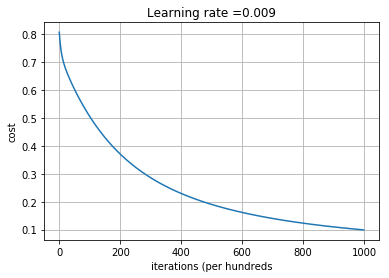

In [26]:
#test cell
params, grads, costs = optimize(w, b, X, Y, num_iterations= 10000, learning_rate = 0.009, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

# ploting of graph
plt.plot(costs)
plt.grid(True)
plt.title("Learning rate =0.009")
plt.ylabel("cost")
plt.xlabel("iterations (per hundreds")

plt.show()

In [21]:
def predict(w,b,X):
    A=sigmoid(np.dot(w.T,X)+b).round()
    return A

In [22]:
#Test cell
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [23]:
#Define the final model to run the algorithm
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    # initialize values
    w,b=initialize_with_zeros(X_train.shape[0])
    
    # Invoke gradient descent & Logistic regression
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = True)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    prediction_y_test = predict(w, b, X_test)
    prediction_y_train = predict(w, b, X_train)
    
    # print error / accuracy %
    print("Error for training set: {} %".format(np.mean(np.abs(prediction_y_train-Y_train)*100)))
    print("Error for training set: {} %".format(np.mean(np.abs(prediction_y_test-Y_test)*100)))
    
    print("Accuracy for training set: {} %".format(100-np.mean(np.abs(prediction_y_train-Y_train)*100)))
    print("Accuracy for training set: {} %".format(100-np.mean(np.abs(prediction_y_test-Y_test)*100)))

In [24]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost at the 0 is 0.6931471805599453
Cost at the 10 is 0.7449403578103343
Cost at the 20 is 0.719248930310633
Cost at the 30 is 0.6973357819554408
Cost at the 40 is 0.677814225655342
Cost at the 50 is 0.6599250465088032
Cost at the 60 is 0.643247578333392
Cost at the 70 is 0.6275206683091039
Cost at the 80 is 0.6125676331969916
Cost at the 90 is 0.5982617123850421
Cost at the 100 is 0.5845083636993086
Cost at the 110 is 0.5712352015686086
Cost at the 120 is 0.5583857594703389
Cost at the 130 is 0.5459153603787441
Cost at the 140 is 0.5337882557626193
Cost at the 150 is 0.5219755887224391
Cost at the 160 is 0.5104539293174178
Cost at the 170 is 0.4992042311980021
Cost at the 180 is 0.4882111162133115
Cost at the 190 is 0.47746243026259855
Cost at the 200 is 0.4669490409465547
Cost at the 210 is 0.4566648721915241
Cost at the 220 is 0.44660719724187364
Cost at the 230 is 0.43677724213062885
Cost at the 240 is 0.42718118785973686
Cost at the 250 is 0.41783169663009556
Cost at the 260 is 0.

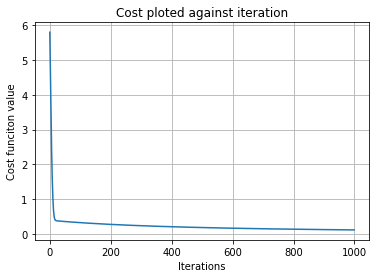

In [25]:
import matplotlib.pyplot as plt
plt.plot(costs)
plt.grid(True)
plt.title("Cost ploted against iteration")
plt.xlabel("Iterations")
plt.ylabel("Cost funciton value")
plt.show()